In [1]:
import PyPDF2

In [2]:
pdf_path = "/Users/minhajul/Downloads/2208.03274.pdf"

In [3]:
reader = PyPDF2.PdfReader(pdf_path)

In [4]:
texts = []
for pi, p in enumerate(reader.pages):
    texts.append(p.extract_text())

In [5]:
len(texts)

15

In [6]:
# Join text into string
full_text = " ".join(texts)
len(full_text)

76550

In [7]:
full_text

'A Holistic Approach to Undesired Content Detection in the Real World\nWarning: some content may contain racism, sexuality, or other harmful language.\nTodor Markov*Chong Zhang*Sandhini Agarwal Tyna Eloundou\nTeddy Lee Steven Adler Angela Jiang Lilian Weng*\nOpenAI\nAbstract\nWe present a holistic approach to building a robust and useful\nnatural language classiﬁcation system for real-world content\nmoderation. The success of such a system relies on a chain of\ncarefully designed and executed steps, including the design\nof content taxonomies and labeling instructions, data qual-\nity control, an active learning pipeline to capture rare events,\nand a variety of methods to make the model robust and to\navoid overﬁtting. Our moderation system is trained to detect\na broad set of categories of undesired content, including sex-\nual content, hateful content, violence, self-harm, and harass-\nment. This approach generalizes to a wide range of different\ncontent taxonomies and can be used t

In [8]:
print(full_text)

A Holistic Approach to Undesired Content Detection in the Real World
Todor Markov*Chong Zhang*Sandhini Agarwal Tyna Eloundou
Teddy Lee Steven Adler Angela Jiang Lilian Weng*
OpenAI
Abstract
We present a holistic approach to building a robust and useful
natural language classiﬁcation system for real-world content
moderation. The success of such a system relies on a chain of
carefully designed and executed steps, including the design
of content taxonomies and labeling instructions, data qual-
ity control, an active learning pipeline to capture rare events,
and a variety of methods to make the model robust and to
avoid overﬁtting. Our moderation system is trained to detect
a broad set of categories of undesired content, including sex-
ual content, hateful content, violence, self-harm, and harass-
ment. This approach generalizes to a wide range of different
content taxonomies and can be used to create high-quality
content classiﬁers that outperform off-the-shelf models.
1 Introduction
Rece

In [11]:
def split_into_chunks(s, text_chunk_size):
    words = s.split()
    chunks = []
    chunk = ""
    for i, word in enumerate(words):
        if i % text_chunk_size == 0 and i > 0:
            chunks.append(chunk.strip())
            chunk = ""
        chunk += word + " "
    if chunk:
        chunks.append(chunk.strip())
    return chunks


In [12]:
text_chunks = split_into_chunks(full_text, text_chunk_size=300)

In [13]:
len(text_chunks)

40

In [14]:
def word_counter(text):
    return len(text.split())

for i, text_chunk in enumerate(text_chunks):
    print(i, word_counter(text_chunk))

0 300
1 300
2 300
3 300
4 300
5 300
6 300
7 300
8 300
9 300
10 300
11 300
12 300
13 300
14 300
15 300
16 300
17 300
18 300
19 300
20 300
21 300
22 300
23 300
24 300
25 300
26 300
27 300
28 300
29 300
30 300
31 300
32 300
33 300
34 300
35 300
36 300
37 300
38 300
39 157


# NER Visualization

Apple was founded by Steve Jobs and Steve Wozniak in April 1976. The company is headquartered in Cupertino, California.
[('Apple', 'ORG'), ('Steve Jobs', 'PERSON'), ('Steve Wozniak', 'PERSON'), ('April 1976', 'DATE'), ('Cupertino', 'GPE'), ('California', 'GPE')]
Apple was founded by Steve Jobs and Steve Wozniak in April 1976.
The company is headquartered in Cupertino, California.


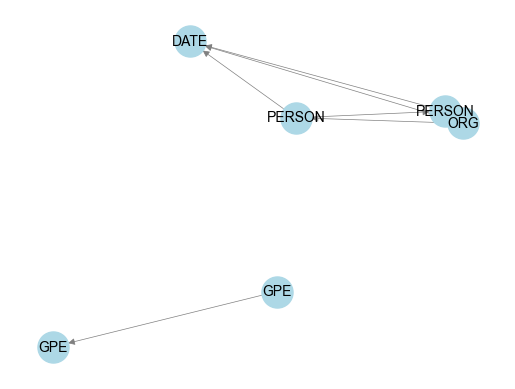

In [7]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

# Load spaCy's pre-trained English language model
nlp = spacy.load('en_core_web_sm')

# Define a text string to analyze
text = "Apple was founded by Steve Jobs and Steve Wozniak in April 1976. The company is headquartered in Cupertino, California."

# Use spaCy to extract named entities from the text
doc = nlp(text)
print(doc)
entities = [(ent.text, ent.label_) for ent in doc.ents]
print(entities)
# Create a directed graph to represent the named entities and their relationships
G = nx.DiGraph()

# Add each named entity to the graph as a node
for entity in entities:
    G.add_node(entity[0], label=entity[1])

# Add edges between named entities that appear in the same sentence
for sent in doc.sents:
    print(sent)
    sent_entities = [ent.text for ent in sent.ents]
    for i, entity in enumerate(sent_entities):
        for j in range(i+1, len(sent_entities)):
            G.add_edge(entity, sent_entities[j])

# Use NetworkX and Matplotlib to visualize the graph
labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx(G, labels=labels, with_labels=True, node_color='lightblue', edge_color='gray', font_size=10, font_family='Arial', width=0.5, node_size=500)
plt.axis('off')
plt.show()


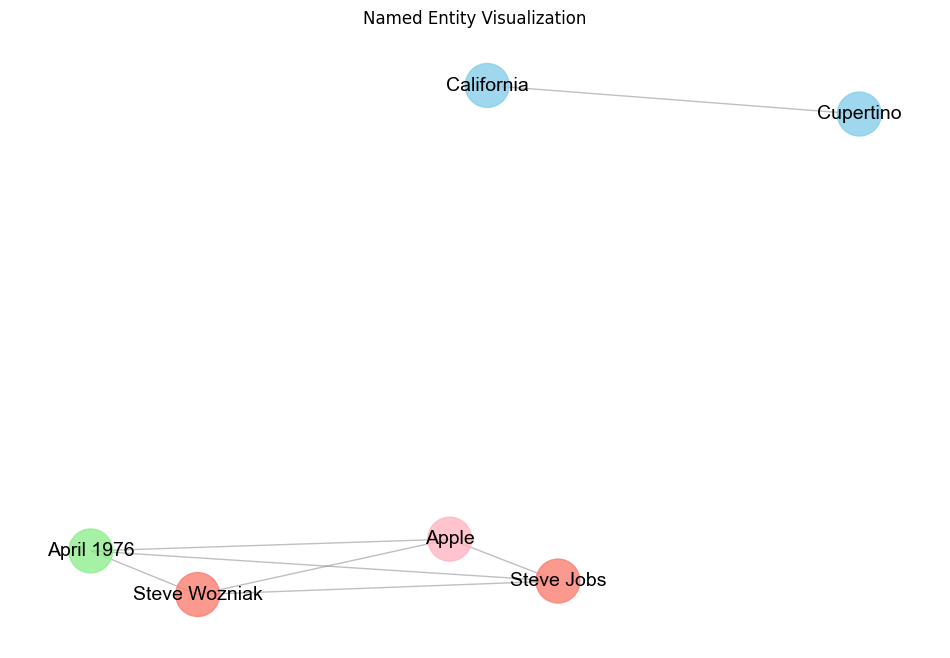

In [11]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

# Load spaCy's pre-trained English language model
nlp = spacy.load('en_core_web_sm')

# Define a text string to analyze
text = "Apple was founded by Steve Jobs and Steve Wozniak in April 1976. The company is headquartered in Cupertino, California."

# Use spaCy to extract named entities from the text
doc = nlp(text)
entities = [(ent.text, ent.label_) for ent in doc.ents]

# Create a dictionary to map entity labels to colors
entity_colors = {'PERSON': 'salmon', 'DATE': 'lightgreen', 'GPE': 'skyblue', 'ORG': 'lightpink', 'CARDINAL': 'lavender'}

# Create a networkx graph
G = nx.Graph()

# Add nodes for each named entity
for entity in entities:
    # Set node color based on entity label
    node_color = entity_colors.get(entity[1], 'gray')
    # Add node to networkx graph
    G.add_node(entity[0], label=entity[0], color=node_color)

# Add edges between named entities
for sent in doc.sents:
    sent_entities = [ent.text for ent in sent.ents]
    for i, entity in enumerate(sent_entities):
        for j in range(i+1, len(sent_entities)):
            if entity != sent_entities[j]:
                # Add edge to networkx graph
                G.add_edge(entity, sent_entities[j])

# Get node positions using networkx spring layout algorithm
pos = nx.spring_layout(G, seed=42)

# Create node and edge color lists for matplotlib visualization
node_colors = [G.nodes[n]['color'] for n in G.nodes]
edge_colors = ['gray' for e in G.edges]

# Set plot size
plt.figure(figsize=(12, 8))

# Draw nodes and edges using matplotlib
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1000, alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, alpha=0.5)

# Add labels to nodes using matplotlib
node_labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=14, font_family='Arial')

# Set plot options
plt.axis('off')
plt.title('Named Entity Visualization')
plt.show()


[[ 32.9262817  -22.15512653]
 [  7.88012953  25.96052928]
 [  2.99794351  18.00007363]
 [-32.61238976 -11.59555404]
 [  0.51060408  -2.18539839]
 [-11.70256906  -8.02452394]]
(6, 2)


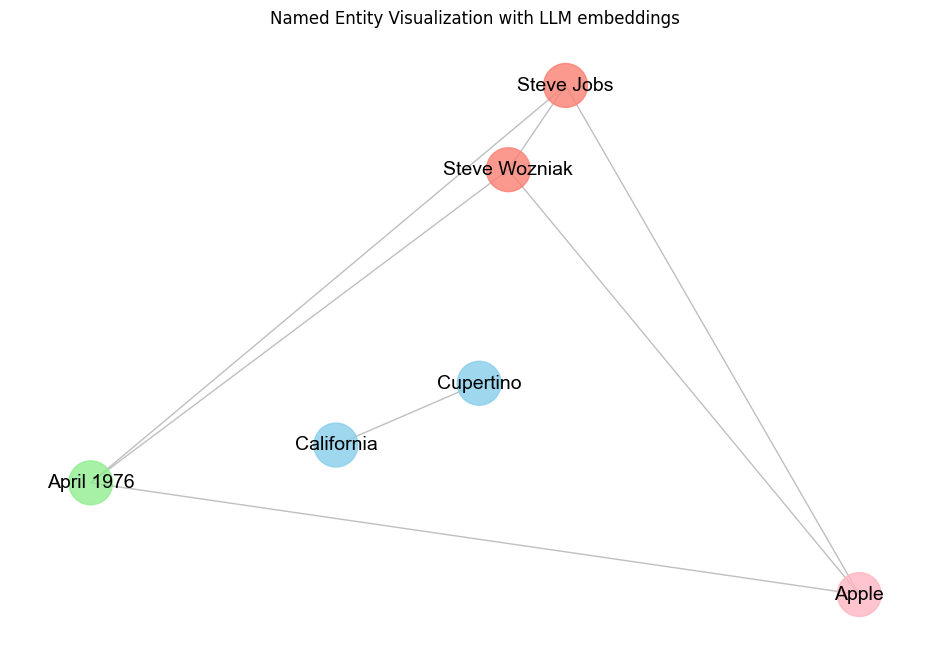

In [21]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Load spaCy's pre-trained English language model with large pre-trained embeddings
nlp = spacy.load('en_core_web_lg')

# Define a text string to analyze
text = "Apple was founded by Steve Jobs and Steve Wozniak in April 1976. The company is headquartered in Cupertino, California."

# Use spaCy to extract named entities from the text and get their embeddings
doc = nlp(text)
entities = [(ent.text, ent.label_, ent.vector) for ent in doc.ents]

# Create a dictionary to map entity labels to colors
entity_colors = {'PERSON': 'salmon', 'DATE': 'lightgreen', 'GPE': 'skyblue', 'ORG': 'lightpink', 'CARDINAL': 'lavender'}

# Create a networkx graph
G = nx.Graph()

# Add nodes for each named entity
for entity in entities:
    # Set node color based on entity label
    node_color = entity_colors.get(entity[1], 'gray')
    # Add node to networkx graph with LLM embedding as node attribute
    G.add_node(entity[0], label=entity[0], color=node_color, emb=entity[2])

# Add edges between named entities
for sent in doc.sents:
    sent_entities = [ent.text for ent in sent.ents]
    for i, entity in enumerate(sent_entities):
        for j in range(i+1, len(sent_entities)):
            if entity != sent_entities[j]:
                # Add edge to networkx graph
                G.add_edge(entity, sent_entities[j])

# Get node embeddings using LLM embeddings
embeddings = [G.nodes[n]['emb'] for n in G.nodes]

# Use PCA to reduce the dimensionality of the embeddings to 2D coordinates
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)
print(embeddings_2d)
print(embeddings_2d.shape)

# Update the pos dictionary with the 2D coordinates
pos = {n: embeddings_2d[i] for i, n in enumerate(G.nodes)}

# Create node and edge color lists for matplotlib visualization
node_colors = [G.nodes[n]['color'] for n in G.nodes]
edge_colors = ['gray' for e in G.edges]

# Set plot size
plt.figure(figsize=(12, 8))

# Draw nodes and edges using matplotlib
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1000, alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, alpha=0.5)

# Add labels to nodes using matplotlib
node_labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=14, font_family='Arial')

# Set plot options
plt.axis('off')
plt.title('Named Entity Visualization with LLM embeddings')
plt.show()


In [10]:
import spacy
import plotly.graph_objects as go

# Load spaCy's pre-trained English language model
nlp = spacy.load('en_core_web_sm')

# Define a text string to analyze
text = "Apple was founded by Steve Jobs and Steve Wozniak in April 1976. The company is headquartered in Cupertino, California."

# Use spaCy to extract named entities from the text
doc = nlp(text)
entities = [(ent.text, ent.label_) for ent in doc.ents]

# Create a dictionary to map entity labels to colors
entity_colors = {'PERSON': 'salmon', 'DATE': 'lightgreen', 'GPE': 'skyblue', 'ORG': 'lightpink', 'CARDINAL': 'lavender'}

# Create a dictionary to store node positions for plotting
positions = {}

# Create a plotly figure
fig = go.Figure()

# Add nodes for each named entity
for entity in entities:
    # Set node color based on entity label
    node_color = entity_colors.get(entity[1], 'gray')
    # Add node to plotly figure
    fig.add_trace(
        go.Scatter(
            x=[0],
            y=[0],
            mode='markers',
            marker=dict(
                size=10,
                color=node_color
            ),
            text=entity[0],
            hoverinfo='text',
            hovertext=f'Label: {entity[1]}'
        )
    )
    # Store node position for later use
    positions[entity[0]] = [0, 0]

# Add edges between named entities
for sent in doc.sents:
    sent_entities = [ent.text for ent in sent.ents]
    for i, entity in enumerate(sent_entities):
        for j in range(i+1, len(sent_entities)):
            if entity != sent_entities[j]:
                fig.add_trace(
                    go.Scatter(
                        x=[positions[entity][0], positions[sent_entities[j]][0]],
                        y=[positions[entity][1], positions[sent_entities[j]][1]],
                        mode='lines',
                        line=dict(
                            width=1,
                            color='gray'
                        ),
                        hoverinfo='none'
                    )
                )

# Set layout options for the plotly figure
fig.update_layout(
    title='Named Entity Visualization',
    title_x=0.5,
    width=800,
    height=600,
    showlegend=False,
    hovermode='closest',
    margin=dict(b=20,l=5,r=5,t=40),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
)

# Use plotly's force-directed layout algorithm to position nodes
fig.update_layout(
    xaxis=dict(constrain='domain'),
    yaxis=dict(scaleanchor='x', scaleratio=1),
    dragmode='pan',
    hoverdistance=100,
    spikedistance=100,
    hoverlabel=dict(bgcolor='white', font_size=12, font_family='Arial'),
    # hoveredge=dict(width=1.5),
    hovermode='closest',
    modebar=dict(bgcolor='white', orientation='v'),
    annotations=[dict(text="Use mouse to pan & zoom, click node to expand", showarrow=False, xref="paper", yref="paper", x=0.05, y=0.95)],
)

# Show the plotly figure
fig.show()


In [22]:
prompt = """Using the context, do entity recognition of these texts using PER (person), ORG (organization), LOC (place name or location), TIME (actually date or year), and MISC (formal agreements and projects).

Here are the definitions with a few examples:
PER (person): Refers to individuals, including their names and titles.
Example:
- Barack Obama, former President of the United States
- J.K. Rowling, author of the Harry Potter series
- Elon Musk, CEO of SpaceX and Tesla


ORG (organization): Refers to institutions, companies, government bodies, and other groups.
Example:
- Microsoft Corporation, a multinational technology company
- United Nations, an intergovernmental organization
- International Red Cross, a humanitarian organization


LOC (place name or location): Refers to geographic locations such as countries, cities, and other landmarks.
Example:
- London, capital of England
- Eiffel Tower, a landmark in Paris, France
- Great Barrier Reef, a coral reef system in Australia


TIME (date or year): Refers to dates, years, and other time-related expressions.
Example:
- January 1st, 2023, the start of a new year
- 1995, the year Toy Story was released


MISC (formal agreements and projects): Refers to miscellaneous named entities that don't fit into the other categories, including formal agreements, projects, and other concepts.
Example:
- Kyoto Protocol, an international agreement to address climate change
- Apollo program, a series of manned spaceflight missions undertaken by NASA
Obamacare, a healthcare reform law in the United States.
"""

In [24]:
prompt

"Using the context, do entity recognition of these texts using PER (person), ORG (organization), LOC (place name or location), TIME (actually date or year), and MISC (formal agreements and projects).\n\nHere are the definitions with a few examples:\nPER (person): Refers to individuals, including their names and titles.\nExample:\n- Barack Obama, former President of the United States\n- J.K. Rowling, author of the Harry Potter series\n- Elon Musk, CEO of SpaceX and Tesla\n\n\nORG (organization): Refers to institutions, companies, government bodies, and other groups.\nExample:\n- Microsoft Corporation, a multinational technology company\n- United Nations, an intergovernmental organization\n- International Red Cross, a humanitarian organization\n\n\nLOC (place name or location): Refers to geographic locations such as countries, cities, and other landmarks.\nExample:\n- London, capital of England\n- Eiffel Tower, a landmark in Paris, France\n- Great Barrier Reef, a coral reef system in Aus

In [23]:
print(prompt)

Using the context, do entity recognition of these texts using PER (person), ORG (organization), LOC (place name or location), TIME (actually date or year), and MISC (formal agreements and projects).

Here are the definitions with a few examples:
PER (person): Refers to individuals, including their names and titles.
Example:
- Barack Obama, former President of the United States
- J.K. Rowling, author of the Harry Potter series
- Elon Musk, CEO of SpaceX and Tesla


ORG (organization): Refers to institutions, companies, government bodies, and other groups.
Example:
- Microsoft Corporation, a multinational technology company
- United Nations, an intergovernmental organization
- International Red Cross, a humanitarian organization


LOC (place name or location): Refers to geographic locations such as countries, cities, and other landmarks.
Example:
- London, capital of England
- Eiffel Tower, a landmark in Paris, France
- Great Barrier Reef, a coral reef system in Australia


TIME (date or